<a href="https://colab.research.google.com/github/Jwangombe11/unsupervised-predict-streamlit-template/blob/JW_updates/2110ACDS_T7_notebook_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

{**2110ACDS_T7**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


  

<h2><center> Movie Recommendations System</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?id=194N0bzcjgy-D5GjvN2ofYic9kd5BAxKz" width = "800" height = '500'/>

**Introduction**
    
In this modern age people are exposed to a myriad option when it comes to entertainment and very limited time to go through all these options. Therefore, the recommendation systems are important as they help them make the right choices, without having to expend their cognitive resources. Recommendation systems are Artificial Intelligence based algorithms that skim through all possible options and create a customized list of items that are interesting and relevant to an individual.

**Problem**
    
Our client has a databse with a huge number of movies which can be overwhelming for their users to choose from. Therefore, there is need to filter, prioritize and efficiently deliver relevant movies in order to alleviate the problem of movies overload, which has created a potential problem to many their users.

**Objective**
    
Our team has been tasked with creation of a Recommender system that will solve this problem by searching through large volume of dynamically generated movies to provide users with personalized movies. Other benefits accrued from this system will include:-
1. Increased user satisfaction
2. Increased sales/conversion
3. Increased loyalty/ share of mind
4. Reduced churn

**Process**
    
In order to achieve this objective the team will follow the process below:-
1. Explore the supplied data, identify potential errors in the data and clean the existing data set;
2. Build a model that is capable rating a users unseen movies;
3. Evaluate the accuracy of the best machine learning model and
4. Explain the inner working of the model to a non-technical audience.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#six>4. Modeling</a>

<a href=#seven>5. Model Performance</a>

<a href=#eight>6. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

### 1.1 Loading experiments to Comet ML  

>Comet is a great tool for model versioning and experimentation as it records the parameters and conditions from each of the experiements- allowing reproducability of results, or go back to a previous version of the experiment.  

>Record of the experiments will be stored in the Advanced-classification project


In [2]:
!pip install comet_ml

In [1]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="BsE7Pgs6vRicQCk7eQzlRozJG",
    project_name="edsa",
    workspace="team7-unsupervised-learning"
)





COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Failed to calculate active processors count. Fall back to default CPU count 1
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/team7-unsupervised-learning/edsa/430444ddc3ea4383909c1bc2a13bc742



### 1.2 Brief Description of Libraries 
> The following libraries will be used to aid creation of a Unsupervised learning model.

>* Dask is a flexible library for parallel computing in Python.Dask is composed of two parts: 
1. Dynamic task scheduling optimized for computation. This is similar to Airflow, Luigi, Celery, or Make, but optimized for interactive computational workloads.
2. “Big Data” collections like parallel arrays, dataframes, and lists that extend common interfaces like NumPy, Pandas, or Python iterators to larger-than-memory or distributed environments. These parallel collections run on top of dynamic task schedulers.
>* gc:- The garbage collector is keeping track of all objects in memory. A new object starts its life in the first generation of the garbage collector. If Python executes a garbage collection process on a generation and an object survives, it moves up into a second, older generation.
>* Numpy:- NumPy (short for Numerical Python) is “the fundamental package for scientific computing with Python” and it is the library Pandas, Matplotlib and Scikit-learn builds on top off.
>* Pandas:- a software library for data manipulation and analysis.
>* Sklearn:- this library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.
>* Plotly:- this library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases. It enables Python users to create beautiful interactive web-based visualizations that can be displayed in Jupyter notebooks, saved to standalone HTML files, or served as part of pure Python-built web applications using Dash.
>* Pickle in Python is primarily used in serializing and deserializing a Python object structure. In other words, it’s the process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.
>* SciPy in Python is an open-source library used for solving mathematical, scientific, engineering, and technical problems. It allows users to manipulate the data and visualize the data using a wide range of high-level Python commands. SciPy is built on the Python NumPy extention. SciPy is also pronounced as “Sigh Pi.”
>* Surprise:- this is a Python scikit for building and analyzing recommender systems that deal with explicit rating data. It provides various ready-to-use prediction algorithms such as baseline algorithms, neighborhood methods, matrix factorization-based ( SVD, PMF, SVD++, NMF), and many others. Also, various similarity measures (cosine, MSD, pearson…) are built-in.
>* Matplotlib:-  a library for creating static, animated, and interactive visualizations in Python.
>* Seaborn:- a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.



In [1]:
! pip install 'fsspec>=0.3.3'

In [4]:
! pip install scikit-surprise

In [1]:
# Libraries for importing and loading data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Libraries for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import pickle
import os
import dask.dataframe as dd
from scipy.sparse import csr_matrix
import gc
import sys
# Libraries for modelling
from sklearn.feature_extraction.text import TfidfVectorizer
from surprise import Reader, Dataset, SVD, SVDpp, accuracy
from surprise import KNNBasic,  KNNWithMeans, KNNBaseline
from surprise.model_selection import cross_validate, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import time
import string
from wordcloud import WordCloud
# Setting global constants to ensure notebook results are reproducible





<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

### 2.1 Brief description of the data
**Data Overview**
>This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. 

**Source**
>The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB

**Supplied Files**
1. genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
2. genome_tags.csv - user assigned tags for genome-related scores
3. imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
4. links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
5. sample_submission.csv - Sample of the submission format for the hackathon.
6. tags.csv - User assigned for the movies within the dataset.
7. test.csv - Contains user and movie IDs with no rating data.
8. train.csv - Contains user and movie IDs with associated rating data and timestamp.

**Note**: The files are about 878.4MB and this can result in computational complexity and hence the need to conduct memory reduction.


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
df_imdb = pd.read_csv('imdb_data.csv')
df_links = pd.read_csv('links.csv')
df_movies = pd.read_csv('movies.csv')
df_tags = pd.read_csv('tags.csv')
sample_submission = pd.read_csv('sample_submission.csv')    

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


**What is EDA?** 

This is unavoidable and one of the major step to fine-tune the given data set(s) in a different form of analysis to understand the insights of the key characteristics of various entities of the data set like column(s), row(s) by applying Pandas, NumPy, Statistical Methods, and Data visualization packages. 

**Out Come of this phase as below**

1. Understanding the given dataset and helps clean up the given dataset.
2. It gives you a clear picture of the features and the relationships between them.
3. Providing guidelines for essential variables and leaving behind/removing non-essential variables.
4. Handling Missing values or human error.
5. Identifying outliers.
6. EDA process would be maximizing insights of a dataset.


In [ ]:
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170132 entries, 0 to 3170131
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 96.7 MB


In [ ]:
df_train.duplicated().sum()

0

The train data has 10000038 observations and  4 features: userId, movieId, rating, timestamp. The userId, movieId and timestamp have integer datatype and the rating has float datatype. There are neither duplicate or null values in the features.

In [ ]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


The test data has 5000019 observations and 2 features: userId and movieId both with integer datatype. No null values

In [ ]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [ ]:
genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069289 entries, 0 to 3069288
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 70.3 MB


In [ ]:
genome_scores.duplicated().sum()

0

genome_scores has 15584448 observations and 3 columns:- movieId, tagId and relevance. The movieId and tagId have an integer datatype while the relevance column has float datatype. There are neither duplicate or null values.

In [ ]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [ ]:
genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [ ]:
genome_tags.duplicated().sum()

0

genome_tags has 1128 observations and 2 columns:- tagId and tag. The tagId has integer datatype while the tag has object datatype. There is neither duplicate or null values.

In [ ]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [ ]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
df_imdb.duplicated().sum()

0

The imdb dataframe has 27278 entries and it has 6 columns:- movieId, title_cast, director, runtime, budget and plot_keywords. The title_cast, director, budget and plot_keywords are of the object datatype,movieId is of integer datatype while the runtime is of float datatype. Only the movieId column has no null values and all the columns have no duplicate values.

In [ ]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [ ]:
df_links.duplicated().sum()

0

The df_links has 62423 observatios and 3 columns:- movieId, imdbId and tmdbId. The movieId and imdbId has integer datatype while the tmdbId had a float datatype. The tmdbId has null values. No columns have duplicate values.

In [ ]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
df_movies.duplicated().sum()

0

The df_movies has 62423 observations nd 3 columns:- movieId, title and genres. The title and genres have the object datatype while the movieId has integer datatype. There are neither duplicate or null values.

In [ ]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [ ]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [ ]:
df_tags.duplicated().sum()

0

The df_tags has 1093360 observations and 4 columns:- userId, movieId, tag and timestamp. The userId, movieId and timestamp have the integer datatypes while the tag column has object datatype. Only the tag column has null values. All the columns have no duplicates.

**Summary**
The data has many observations meaning that the models will reliable due to exposure to uvast amounts of data. However, the will computational complexity meaning that alot of resources will be to run the models.

#### Memory Reduction
---
Memory reduction can be performed by change each column to a data type that is best suited for the range of values it contains.

**What can be caused without memory reduction?**

This causes a large amount of memory to be placed in reserves for each observation which leads to memory depletion and putting your machine in an unstable state.

**Columns that will be observed:**
* All columns contain `int64` and `float64` data types.
* `timestamp` in the Train DataFrame has an `object` datatype which needs to be converted.

Firstly, we need to get the maximum value in each column to see which data type suits it best.

In [ ]:
print('---Movies Data Set---')
print(df_movies.max(numeric_only = True))
print('\n---IMDB Data Set---')
print(df_imdb.max(numeric_only = True))
print('\n---Train Data Set---')
print(df_train.max(numeric_only = True))
print('\n---Test Data Set---')
print(df_test.max(numeric_only = True))
print('\n---Links Data Set---')
print(df_links.max(numeric_only = True))

---Movies Data Set---
movieId    209171
dtype: int64

---IMDB Data Set---
movieId    131262.0
runtime       877.0
dtype: float64

---Train Data Set---
userId       1.625410e+05
movieId      2.091710e+05
rating       5.000000e+00
timestamp    1.574328e+09
dtype: float64

---Test Data Set---
userId     162541
movieId    209163
dtype: int64

---Links Data Set---
movieId      209171.0
imdbId     11170942.0
tmdbId       646282.0
dtype: float64


### <center>**Data Types**</center>

---
<table>
  <tr>
    <th>Data Type</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>int8</td>
    <td>Byte (-128 to 127)</td>
  </tr>
  <tr>
    <td>int16</td>
    <td>Integer (-32768 to 32767)</td>
  </tr>
  <tr>
    <td>int32</td>
    <td>Integer (-2147483648 to 2147483647)</td>
  </tr>
  <tr>
    <td>int64</td>
    <td>Integer (-9223372036854775808 to 9223372036854775807)</td>
  </tr>
  <tr>
    <td>uint8</td>
    <td>Unsigned integer (0 to 255)</td>
  </tr>
  <tr>
    <td>uint16</td>
    <td>Unsigned integer (0 to 65535)</td>
  </tr>
  <tr>
    <td>uint32</td>
    <td>Unsigned integer (0 to 4294967295)</td>
  </tr>
  <tr>
    <td>uint64</td>
    <td>Unsigned integer (0 to 18446744073709551615)</td>
  </tr>
  <tr>
    <td>float16</td>
    <td>Half precision float: sign bit, 5 bits exponent</td>
  </tr>
  <tr>
    <td>float32</td>
    <td>Single precision float: sign bit, 8 bits exponent</td>
  </tr>
  <tr>
    <td>float64</td>
    <td>Double precision float: sign bit, 11 bits exponent</td>
  </tr>
</table>

Based on our observation on the maximum values in the Train data frame and the different data types, we can assign each column a new datatype.
#### **Data types to be assigned**
**Movies Data Set:**     movieId --> `uint32`

**IMDB Data Set:** movieId --> `uint32`  |  runtime --> `float16`

**Train Data Set:** userId --> `uint32`  |  movieId --> `uint32`  |  rating --> `float16`  |  timestamp --> `uint32`

**Test Data Set:** userId --> `uint32`  |  movieId --> `uint32`

**Links Data Set:** movieId --> `uint`  |  imdbId --> `uint32`  |  tmdbId --> `will be removed`

In [ ]:
# Data Frame sizes before conversion
before_convert = (sys.getsizeof(df_movies) + 
                  sys.getsizeof(df_imdb) + 
                  sys.getsizeof(df_train) + 
                  sys.getsizeof(df_test) + 
                  sys.getsizeof(df_links)) / 1000000

In [4]:
# Movies DF
data_types_dict1 = {'movieId': 'uint32'}
df_movies = df_movies.astype(data_types_dict1)

# IMDB DF
data_types_dict2 = {'movieId': 'uint32', 'runtime': 'float16' }
df_imdb = df_imdb.astype(data_types_dict2)


# Train DF
data_types_dict3 = {'movieId': 'uint32','userId': 'uint32','timestamp': 'uint32', 'rating': 'float16'}
df_train = df_train.astype(data_types_dict3)


# Test DF
data_types_dict4 = {'movieId': 'uint32', 'userId':'uint32'}
df_test = df_test.astype(data_types_dict4)


# Links DF
data_types_dict5 = {'movieId': 'uint32','imdbId': 'uint32' }
df_links = df_links.astype(data_types_dict5)

# Genome score DF
data_types_dict6 = {'movieId': 'uint32','tagId': 'uint16', 'relevance': 'float16'}
genome_scores = genome_scores.astype(data_types_dict6)


In [ ]:
# Data Frame sizes after conversion
after_convert = (sys.getsizeof(df_movies) + 
                  sys.getsizeof(df_imdb) + 
                  sys.getsizeof(df_train) + 
                  sys.getsizeof(df_test) + 
                  sys.getsizeof(df_links)) / 1000000

In [ ]:
# Plotly template being used
template = 'plotly_dark'

# Colour being used for all plots
color = '#B52A2D'

In [ ]:
fig = go.Figure()

fig.add_trace(go.Indicator(
    value = after_convert,
    delta = {'reference': before_convert},
    gauge = {
        'axis': {
            'range': [None, 1000]
        },
        'threshold' : {
            'line': {
                'color': "red", 'width': 4
            }, 
            'thickness': 0.75, 
            'value': before_convert
        }
    },
    mode = "number+delta+gauge",
    title = {'text': "Memory Usage in MB"}))


fig.update_layout(
    template = template)

fig.update_traces(gauge_bar_color = color)

The combined memory usage has been reduced by approximately 221MB. This will make the transfer of data much faster and will reduce the amount of resources needed to process the data.

If the data frames are merged then it will increase the memory usage because of the increase in dimensions / columns. To avoid increasing the amount of resources being used, remove variables that you are no longer using by using `del <variable_name>`.
For example, if you merge the data frames and store it in a new variable then there is no need to keep the individual data frame variables.

### Most Common Genres
---
We will be observing the frequency of genres. As we saw above, the genres column has multiple genres seperated with a vertical line `|` therefore we first have to split the genres and store them in a list.

In [ ]:
# Splitting the genres
movie_genres = df_movies['genres'].apply(lambda x: x.split('|'))

list_genres = []
for genre_list in movie_genres:
    for genre in genre_list:
        list_genres.append(genre)

# Convert the list into a Series to get value count
list_genres = pd.Series(list_genres)

In [ ]:
def series_to_df(series, column1, column2 = 'total'):
    """
        * Converts series into a count DataFrame
    """
    series_count = series.value_counts()
    series_df = pd.DataFrame(columns = [column1, column2])
    series_df[column1] = list(series_count.index)
    series_df[column2] = series_count.values
    
    return series_df

In [ ]:
genre_df = series_to_df(list_genres, 'genre')

In [ ]:
genre_df

,genre,total
0,Drama,25606
1,Comedy,16870
2,Thriller,8654
3,Romance,7719
4,Action,7348
5,Horror,5989
6,Documentary,5605
7,Crime,5319
8,(no genres listed),5062
9,Adventure,4145


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = genre_df['genre'],
    y = genre_df['total'],
    text = ['{:.1f} %'.format((val / genre_df['total'].sum() * 100)) for val in (genre_df['total'])],
    textposition = 'auto',
    textfont = dict(color = '#FFFFFF')
))

fig.update_layout(
    title = {
        'text': '10 Most Common Genres',
        'font': {
            'size': 25
        }
    },
    title_x = 0.5,
    template = template
)

fig.update_xaxes(
    title = {
        'text': 'Genres'
    }
)

fig.update_yaxes(
    title = {
        'text': 'Frequency'
    }
)

fig.update_traces(marker_color = color)

<li> <code> Drama </code>, <code> Comedy </code> have a higher occurence in the dataset.

<li> <code> Musical </code>, <code> Film-Noir </code>, <code> IMAX </code> genres have the lowest respectively, they all have an ocurence of under $1 $% 

### Movies analysis
---
**We will be displaying the following figures:**
* Total Number of Movies
* Total Number of Users
* Average Rating for Movies
* Average Runtime for Movies


In [ ]:
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number",
    value = df_movies['movieId'].nunique(),
    domain = {'row': 0, 'column': 0}, 
    title = 'Total Movies'))

fig.add_trace(go.Indicator(
    mode = "number",
    value = df_train['userId'].nunique(),
    domain = {'row': 1, 'column': 0}, 
    title = 'Total Users'))


fig.add_trace(go.Indicator(
    mode = "number",
    value = np.mean(np.array(df_train['rating'])),
    domain = {'row': 0, 'column': 1}, 
    title = 'Average Rating for Movies'))

fig.add_trace(go.Indicator(
    mode = "number",
    value = np.mean(np.array(df_imdb['runtime'].dropna())),
    domain = {'row': 1, 'column': 1}, 
    title = 'Average Runtime for Movies'))

fig.update_layout(
    grid = {'rows': 2, 'columns': 2, 'pattern': "independent"}, 
    template = template)

<li> There are about <code> 62400 movies </code> and about <code> 162500 users </code>.

<li> The average rating for movies is about <code> 3.53 </code> and the average runtime for movies is approximately <code> 100.3 </code>. 

### Rating Distribution
---
We will be looking at how ratings are distributed

In [ ]:
rating_df = series_to_df(df_train['rating'], 'rating')

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = rating_df['rating'],
    y = rating_df['total'],
    text = ['{:.1f} %'.format((val / rating_df['total'].sum() * 100)) for val in (rating_df['total'])],
    textposition = 'auto',
    textfont = dict(color = '#FFFFFF')
))

fig.update_layout(
    title = {
        'text': 'Rating Distribution',
        'font': {
            'size': 25
        }
    },
    title_x = 0.5,
    template = template
)

fig.update_xaxes(
    title = {
        'text': 'Ratings'
    }
)

fig.update_yaxes(
    title = {
        'text': 'Count Per Rating'
    }
)

fig.update_traces(marker_color = color)

* `26.5%` of all ratings is `4` which is the majority.
* The distribution shows a skewness in the positive direction
* Very good quality movies in the dataset, as most of the movies, have been rated between the range from 3 to 5.
* Considering only rating is not the right measure of popularity, as there may be the case where one movie is rated 5 by few users and another rated 4.8 by many users.

### Distribution of the number of ratings per user
---
Knowing that there are so many users, we just can't look at them all. Therefore we will visualise the first 50 users and the total numer of rating for each of them.

In [ ]:
user_p = df_train.groupby('userId')['rating'].count().clip(upper = 50)
fig = go.Figure()

fig.add_trace(go.Histogram(x = user_p.values,
                     name = 'rating',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 1)))

fig.update_layout(
    title = {
        'text': 'Number of Ratings Per User (First 50 Users)',
        'font': {
            'size': 25
        }
    },
    title_x = 0.5,
    template = template,
    bargap = 0.2
)

fig.update_xaxes(
    title = {
        'text': 'Users'
    }
)

fig.update_yaxes(
    title = {
        'text': 'Number of Ratings'
    }
)

fig.update_traces(marker_color = color)

It appears that there are users who have rated only a few movies, this implies that not all users are equivalent to suggest movie recommendations to other users. This is only one perspective, we could also view it as movies that only received one or very few ratings. This can be caused by a lack of popularity or received a bad rating by the first user then became overlooked by other users.

### Most Ratings per Movie
---
We will be looking at the top 10 movies with the most total ratings (this is only the total number of ratings given, not the average ratings).

In [ ]:
# Merge the Movies and Train DataFrame to get names of movies
movies_df = df_train.merge(df_movies, how = 'left', on = 'movieId')

In [ ]:
# Get top 10 movies with the most ratings
total_ratings = movies_df.groupby('title')['rating'].count().sort_values(ascending = False)[:10]

# Create a DataFrame for the total ratings
total_ratings_df= pd.DataFrame(columns = ['movies', 'total'])
total_ratings_df['movies'] = list(total_ratings.index)
total_ratings_df['total'] = total_ratings.values

In [ ]:
"""
    * Plotly adds data to plots in a stack manner
    * Data must be in ascending order with the lowest total first
    * This will allow the highest total to appear at the top
"""

movie_p = total_ratings_df.sort_values('total', ascending = True)
fig = go.Figure()

fig.add_trace(go.Bar(x = movie_p['total'],
                     y = movie_p['movies'],
                     orientation = 'h'
                    
                    ))
fig.update_layout(
    title = {
        'text': 'Top 10 Most Rated Movies',
        'font': {
            'size': 25
        }
    },
    title_x = 0.5,
    template = template,
    bargap = 0.2
)

fig.update_xaxes(
    title = {
        'text': 'Total Ratings'
    }
)

fig.update_yaxes(
    title = {
        'text': 'Movies'
    }
)

fig.update_traces(marker_color = color)

* The movie with the most ratings is **Shawshank Redemption, The (1994)**, the movie is about a banker who is convicted for the murder of his wife and her lover and is sentenced to two consecutive life sentences at the Shawshank State Prison. This movie is based on **Rita Hayworth and Shawshank Redemption** by Stephen King and it is claimed to be amongs the best movies ever made in World Cinema and applauded by many film critics.
* **Forrest Gump (1994)** is about a man with a low IQ, recounts the early years of his life when he found himself in the middle of key historical events. This movie has been voted the greatest film character of all time, beating James Bond and Scarlett O'Hara in the process

### Most Average Rated Movie
---
We will be looking at the top 10 movies with the most average rating.

In [ ]:
"""
    * There are movies with only one rating which is impractical to include
    * The threshold being used is 20
    * All movies with a rating total of less than or equal to 20 will be filtered out
"""

min_total_ratings = 20
filter_ = movies_df['movieId'].value_counts() > min_total_ratings
filter_ = filter_[filter_].index.tolist()

df_filtered = movies_df[movies_df['movieId'].isin(filter_)]

In [ ]:
# Get top 10 movies with the most average ratings
avg_ratings = df_filtered.groupby('title')['rating'].mean().sort_values(ascending = False)[:10]

# Create a DataFrame for the avg ratings
avg_ratings_df= pd.DataFrame(columns = ['movies', 'average'])
avg_ratings_df['movies'] = list(avg_ratings.index)
avg_ratings_df['average'] = avg_ratings.values

In [ ]:
avg_df = avg_ratings_df.sort_values('average', ascending = True)
fig = go.Figure()

fig.add_trace(go.Bar(x = avg_df['average'],
                     y = avg_df['movies'],
                     orientation = 'h'
                    
                    ))
fig.update_layout(
    title = {
        'text': 'Top 10 Most Average Rated Movies',
        'font': {
            'size': 25
        }
    },
    title_x = 0.5,
    template = template,
    bargap = 0.2
)

fig.update_xaxes(
    title = {
        'text': 'Average Ratings'
    }
)

fig.update_yaxes(
    title = {
        'text': 'Movies'
    }
)

fig.update_traces(marker_color = color)

### Number of ratings per year
---
We will be looking at the total number of ratings per year. 
​

**Note:** This is for the total ratings ever made each year.

In [ ]:
def timestamp_to_date(timestamps):
    """
        * Convert timestamps to dates 
        * Only the year is extracted
        * Get the count for each year
        
        Parameters:
        ===========================
        * timestamps: Series or list containing timestamps
        
        Returns:
        ===========================
        * DataFrame sorted by year
    """
    years = []
    for timestamp in timestamps:
        years.append(pd.Timestamp(timestamp, unit = 's').year)# Convert timestamp datetime and return the year
        
    years = pd.Series(years).value_counts()
    df_years = pd.DataFrame(columns = ['years', 'total'])
    df_years['years'] = list(years.index)
    df_years['total'] = years.values
    
    return df_years.sort_values(by = 'years')

In [ ]:
year_counts = timestamp_to_date(df_train['timestamp'])

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x = year_counts['years'], 
               y = year_counts['total'], 
               mode='lines+markers'))

fig.update_layout(
    title = {
        'text': 'Number of Ratings per year',
        'font': {
            'size': 25
        }
    },
    title_x = 0.5,
    template = template,
)

fig.update_xaxes(
    title = {
        'text': 'Years'
    }
)

fig.update_yaxes(
    title = {
        'text': 'Number of Ratings'
    }
)

fig.update_traces(marker_color = color)

<blockquote>The most ratings were received in the year 2016 with a total of <b>702 962</b>. As we can see that the year 1998 received the least count of ratings with a total of <b>108 811</b>. After 2014, the count of rating increased tremendously and started declining after 2016.</blockquote>

### Top 10 Actors With Most Movie Appearances
---
We will extracting the top 10 actors with the most movie appearances. 

In [ ]:
# Extract all actors
actors_ = []

for actors in df_imdb['title_cast'].dropna():
    for actor in actors.split('|'):
        actors_.append(actor)

In [ ]:
actors_ = pd.Series(actors_)

actors_df= series_to_df(actors_, 'actors', 'total movies')

In [ ]:
actors_df = actors_df[:5].sort_values('total movies', ascending = True)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(x = actors_df['total movies'],
                     y = actors_df['actors'],
                     orientation = 'h'
                    
                    ))
fig.update_layout(
    title = {
        'text': 'Top 5 Actors With Most Movie Appearances',
        'font': {
            'size': 25
        }
    },
    title_x = 0.5,
    template = template,
    bargap = 0.2
)

fig.update_xaxes(
    title = {
        'text': 'Total Movies'
    }
)

fig.update_yaxes(
    title = {
        'text': 'Actors'
    }
)

fig.update_traces(marker_color = color)

* **Samuel L. Jackson** shows up, nail his scenes, and then take off, leaving less in-demand collaborators and co-stars to finish the film while he moves on to the next one. This explains why he stars in so many movies.
* **Steve Buscemi** plays in a lot of comedy movies including those with Adam Sandler where he is a regular cast.

### Top 10 Directors with Most Directed Movies
---
We will  be extracting the top 10 directors who directed the most movies.

In [ ]:
directors_ = df_imdb['director'].dropna()

directors_df = series_to_df(directors_, 'directors', 'total movies')

In [ ]:
directors_df = directors_df[1:11].sort_values('total movies', ascending = True)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(x = directors_df['total movies'],
                     y = directors_df['directors'],
                     orientation = 'h'
                    
                    ))
fig.update_layout(
    title = {
        'text': 'Top 5 Directors with Most Directed Movies',
        'font': {
            'size': 25
        }
    },
    title_x = 0.5,
    template = template,
    bargap = 0.2
)

fig.update_xaxes(
    title = {
        'text': 'Total Movies'
    }
)

fig.update_yaxes(
    title = {
        'text': 'Directors'
    }
)

fig.update_traces(marker_color = color)

* **Luc Besson** is a French film director, screenwriter, and producer.He won Best Director and Best French Director for his sci-fi action film The Fifth Element (1997). He wrote and directed the 2014 sci-fi action film Lucy and the 2017 space opera film Valerian and the City of a Thousand Planets. As writer, director, or producer, Besson has so far been involved in the creation of more than 50 films.
* **Stephen King** is an author of many books which end up on screen. He is best known for his book and movie I.T.
* **William Shakespeare**'s plays has been credited on 1,500 movies , including those under production but not yet released.

### Top 5 genres (movies) produced per year 
---
Using the top 5 most frequency genres, we will see how frequent movies were created in those genres over time.

In [ ]:
def get_years(df, genre):
    """
        Gets the years of when movies were released in a specific genre
        
        Parameters:
        ===============================================================
        * df: DataFrame 
        * genre: genre to be used as a filter
        
        Return:
        ===============================================================
        * Series containing the years for all movies in the specified genre
        
    """
    genre_filter = df[df['genres'].str.contains(genre)]['title']
    
    years = []
    for title in genre_filter:
        if '(' in title:
            if title[title.index('(') + 1 : title.index(')')].isdigit() and len(str(title[title.index('(') + 1 : title.index(')')])) == 4:
                years.append(title[title.index('(') + 1 : title.index(')')])
            else:
                pass
    return pd.Series(years)

In [ ]:
# Get the years for each genre
drama = get_years(df_movies, 'Drama')
comedy = get_years(df_movies, 'Comedy')
thriller = get_years(df_movies, 'Thriller')
romance = get_years(df_movies, 'Romance')
action = get_years(df_movies, 'Action')

In [ ]:
# Convert into DataFrame with years counts
drama = series_to_df(drama, 'years', 'count').sort_values(by = 'years')
comedy = series_to_df(comedy, 'years', 'count').sort_values(by = 'years')
thriller = series_to_df(thriller, 'years', 'count').sort_values(by = 'years')
romance = series_to_df(romance, 'years', 'count').sort_values(by = 'years')
action = series_to_df(action, 'years', 'count').sort_values(by = 'years')

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x = drama['years'].astype('int32'), 
               y = drama['count'], 
               mode='lines', 
               name = 'Drama'))

fig.add_trace(
    go.Scatter(x = comedy['years'].astype('int32'), 
               y = comedy['count'], 
               mode='lines', 
               name = 'Comedy'))


fig.add_trace(
    go.Scatter(x = thriller['years'].astype('int32'), 
               y = thriller['count'], 
               mode='lines', 
               name = 'Thriller'))

fig.add_trace(
    go.Scatter(x = romance['years'].astype('int32'), 
               y = romance['count'], 
               mode='lines', 
               name = 'Romance'))

fig.add_trace(
    go.Scatter(x = action['years'].astype('int32'), 
               y = action['count'], 
               mode='lines', 
               name = 'Action'))

fig.update_layout(
    title = {
        'text': 'Number of Movies produced per year for the top 5 genres',
        'font': {
            'size': 25
        }
    },
    title_x = 0.5,
    template = template
)

fig.update_xaxes(
    title = {
        'text': 'Years'
    }
)

fig.update_yaxes(
    title = {
        'text': 'Number of Movies'
    }
)


<a id="six"></a>
## 4. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the the recommended movie. |

---

<a id="model"></a>
### Make a Movie Recommendation Model
---
* Collaborative Filtering

Collaborative Filtering is the most common technique used when it comes to building intelligent recommender systems that can learn to give better recommendations as more information about users is collected. This is a technique that can filter out items that a user might like on the basis of reactions by similar users.

It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

There are different types of algorithms in the family of collaborative filtering.

    * **Model Based**
    
Model based approaches involves a step to reduce or compress the large but sparse user-item matrix. For understanding this step, a basic understanding of dimensionality reduction can be very helpful.

**Dimensionality Reduction**

In the user-item matrix, there are two dimensions:

>1. The number of users
>2. The number of items

If the matrix is mostly empty, reducing dimensions can improve the performance of the algorithm in terms of both space and time. You can use various methods like matrix factorization or autoencoders to do this.

Matrix factorization can be seen as breaking down a large matrix into a product of smaller ones. This is similar to the factorization of integers, where 12 can be written as 6 x 2 or 4 x 3. In the case of matrices, a matrix A with dimensions m x n can be reduced to a product of two matrices X and Y with dimensions m x p and p x n respectively.

    * **Memory Based**
    
In this category,statistical techniques are applied to the entire dataset to calculate the predictions.

To find the rating R that a user U would give to an item I, the approach includes:

> 1. Finding users similar to U who have rated the item I
> 2. Calculating the rating R based the ratings of users found in the previous step

Memory based can be further classified in **User-based** and **Item-based**. The rating matrix is used to find similar users based on the ratings they give, is called user-based or user-user collaborative filtering. If you use the rating matrix to find similar items based on the ratings given to them by users, then the approach is called item-based or item-item collaborative filtering.

The two approaches are mathematically quite similar, but there is a conceptual difference between the two. Here’s how the two compare:

***User-based***: For a user U, with a set of similar users determined based on rating vectors consisting of given item ratings, the rating for an item I, which hasn’t been rated, is found by picking out N users from the similarity list who have rated the item I and calculating the rating based on these N ratings.

***Item-based***: For an item I, with a set of similar items determined based on rating vectors consisting of received user ratings, the rating by a user U, who hasn’t rated it, is found by picking out N items from the similarity list that have been rated by U and calculating the rating based on these N ratings.



#### Model based approach

In this approach, CF models are developed using machine learning algorithms to predict user’s rating of unrated items.

Models used include:-

1. Singular Value Decomposition (SVD)

The Singular Value Decomposition (SVD) of a matrix is a factorization of that matrix into three matrices. It has some interesting algebraic properties and conveys important geometrical and theoretical insights about linear transformations. It also has some important applications in data science. In this article, I will try to explain the mathematical intuition behind SVD and its geometrical meaning. 

Mathematics behind SVD
The SVD of  mxn matrix A is given by the formula :

`A = UWV^{T}`

where:

**U:**  `mxn` matrix of the orthonormal eigenvectors of AA^{T}              .

**VT:** transpose of a `nxn` matrix containing the orthonormal eigenvectors of `A^{T}A`.

**W:**  a `nxn` diagonal matrix of the singular values which are the square roots of the eigenvalues of `A^{T}A`.          .

In [5]:
#Initialize the Surprise Library Objects
reader = Reader()
data = Dataset.load_from_df(df_train[['userId','movieId','rating']],reader)
svd = SVD()
svd_pp = SVDpp()
kf = KFold(n_splits= 5)

In [6]:
# training and creating predictions
for trainset, testset in kf.split(data):
    print(time.asctime(time.localtime()))
    svd.fit(trainset)
    predictions = svd.test(testset)
    
    print(accuracy.rmse(predictions, verbose= True))

print(time.asctime(time.localtime()))


Thu May  5 14:48:28 2022
RMSE: 0.8338
0.8337600204636949
Thu May  5 15:00:40 2022
RMSE: 0.8333
0.8332535676292798
Thu May  5 15:12:47 2022
RMSE: 0.8334
0.833383026499624
Thu May  5 15:24:36 2022
RMSE: 0.8346
0.8345651122926158
Thu May  5 15:36:34 2022
RMSE: 0.8352
0.8351737332562584
Thu May  5 15:47:54 2022


In [7]:
rmse = (accuracy.rmse(predictions,verbose= True))

RMSE: 0.8352


In [8]:
# Creating dictionaries with parameters and metrics.
params = {
          "model_type": "Singular Value Decomposition"
          }
metrics = {"rmse": rmse
           }

In [9]:
# Logging the parameters and metrics to an experiment on comet.
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [10]:
experiment.end()

COMET WARNING: Couldn't retrieve Google Colab notebook content
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/team7-unsupervised-learning/edsa/430444ddc3ea4383909c1bc2a13bc742
COMET INFO:   Metrics:
COMET INFO:     rmse : 0.8351737332562584
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1bwrk7jrzGzyVEeCYG12uZf53IIg1X_Hs
COMET INFO:   Parameters:
COMET INFO:     model_type : Singular Value Decomposition
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, 

In [ ]:
#Carry out prediction using the preloaded SVD Model
#svd = pickle.load(open('svd.pkl', 'rb'))
print(time.asctime(time.localtime()))
df_test['rating'] = np.NaN
df_test['rating'] = df_test.apply(lambda x : svd.predict(x['userId'],x['movieId'])[3], axis = 1)
print(time.asctime(time.localtime()))

Thu May  5 10:15:48 2022
Thu May  5 10:18:15 2022


In [ ]:
# Prepare final submission file
df_test['Id'] = df_test['userId'].astype(str) + '_' + df_test['movieId'].astype(str)
test_df = df_test.drop(columns=(['userId',"movieId"]))
test_df = test_df.reindex(columns = ['Id','rating'])
test_df.to_csv('predict.csv',index=False)

2. K Nearest Neighbours (KNN)

The K-nearest neighbors (KNN) algorithm is a type of machine learning algorithms. It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.

**Theory**

The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms. It simply calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.


In [ ]:
#Initialize the Surprise Library Objects
reader = Reader()
data = Dataset.load_from_df(df_train[['userId','movieId','rating']],reader)
knn = KNNBasic()
kf = KFold(n_splits= 5)

In [ ]:
# training and creating predictions
for trainset, testset in kf.split(data):
    print(time.asctime(time.localtime()))
    knn.fit(trainset)
    predictions = knn.test(testset)
    
    print(accuracy.rmse(predictions, verbose= True))

print(time.asctime(time.localtime()))

In [ ]:
#Carry out prediction using the preloaded SVD Model
knn = pickle.load(open('../input/svd-model-movie-recommendation/knn.pkl', 'rb'))
print(time.asctime(time.localtime()))
df_test['rating'] = np.NaN
df_test['rating'] = df_test.apply(lambda x : knn.predict(x['userId'],x['movieId'])[3], axis = 1)
print(time.asctime(time.localtime()))

In [ ]:
# Prepare final submission file
df_test['Id'] = df_test['userId'].astype(str) + '_' + df_test['movieId'].astype(str)
test_df = df_test.drop(columns=(['userId',"movieId"]))
test_df = test_df.reindex(columns = ['Id','rating'])
test_df.to_csv('predict.csv',index=False)

* Content-based filtering

Content-based filtering is one popular technique of recommendation or recommender systems. The content or attributes of the things you like are referred to as "content." Here, the system uses users’ features and likes in order to recommend to them things that they might like. It uses the information provided by a user over the internet and the ones they are able to gather and then they curate recommendations according to that.  
 
The goal behind content-based filtering is to classify products with specific keywords, learn what the customer likes, look up those terms in the database, and then recommend similar things. This type of recommender system is hugely dependent on the inputs provided by users. 

* How does it work?

This method revolves completely around comparing user interests to product features. The products that have the most overlapping features with user interests are what’s recommended. Given the significance of product features in this system, it is important to discuss how the user’s favorite features are decided.

Here, two methods can be used (possibly in combination). Firstly, users can be given a list of features out of which they can choose whatever they identify with the most. Secondly, the algorithm can keep track of the products the user has chosen before and add those features to the users’ data. Similarly, product features can be identified by the developers of the product themselves. Moreover, users can be asked what features they believe identify with the products the most.

* What are the concepts used in Content Based Recommenders?
1. Term Frequency (TF) and Inverse Document Frequency (IDF)

The concepts of Term Frequency (TF) and Inverse Document Frequency (IDF) are used in information retrieval systems and also content based filtering mechanisms (such as a content based recommender). They are used to determine the relative importance of a document / article / news item / movie etc. TF is simply the frequency of a word in a document. IDF is the inverse of the document frequency among the whole corpus of documents. 

* How is TF-IDF calculated?

TF-IDF for a word in a document is calculated by multiplying two different metrics:

The **term frequency** of a word in a document. There are several ways of calculating this frequency, with the simplest being a raw count of instances a word appears in a document. Then, there are ways to adjust the frequency, by length of a document, or by the raw frequency of the most frequent word in a document.

The **inverse document frequency** of the word across a set of documents. This means, how common or rare a word is in the entire document set. The closer it is to 0, the more common a word is. This metric can be calculated by taking the total number of documents, dividing it by the number of documents that contain a word, and calculating the logarithm.
So, if the word is very common and appears in many documents, this number will approach 0. Otherwise, it will approach 1. Multiplying these two numbers results in the TF-IDF score of a word in a document. The higher the score, the more relevant that word is in that particular document.
To put it in more formal mathematical terms, the TF-IDF score for the word `t` in the document `d` from the document set D is calculated as follows:

>>> $tfidf(t,d,D) = tf(t,d) . idf(t,D)$

>>> where:

>>> $tf(t,d) = log(1 + freq(t,d)$

>>> $idf(t,D) = log(\frac{N}{count(dϵD:tϵd)})$

    
2. Cosine Similarity
    
This is a metric that measures the cosine of the angle between two vectors projected in a multi-dimensional space. The smaller the angle between the two vectors, the more similar they are to each other. Suppose the angle between the two vectors is 90 degrees, the cosine similarity will have a value of 0; this means that the two vectors are perpendicular to each other which means they have no correlation between them. As the cosine similarity measurement gets closer to 1, then the angle between the two vectors A and B becomes smaller. In this case, A and B are more similar to each other.

>>><img src ="https://drive.google.com/uc?id=1WJSAr-G-vEAghRlwVb2aZ_x-U6m2v5ew " width = "800" height = '500'/>
    
Since the 𝑐𝑜𝑠(𝜃) value is in the range [−1,1] :
    
* −1 value will indicate strongly opposite vectors i.e. no similarity
    
* 0 indicates independent (or orthogonal) vectors
    
* 1 indicates a high similarity between the vectors




To implement the content-based model the following steps were carried out:-
1. Preprocessing the data by

        i. Merging the appropriate data, in this case movies, genome_scores, genome_tags and imdb_data dataframes that have contents that will be the features of the model.
        
        ii. Replacing the missing values with empty strings.

2. Feature engineering
        
        i. Combine all the relevant data in one column.
        ii. Converting the content in the combined column into numerics using the Tfidf vectorizer.
        

In [17]:
# To facilitate merging the resulting dataframe we will rename the movieId column to imdbId
columns = df_imdb.columns.to_numpy()
columns[0] = 'imdbId'

# we now update the column names
df_imdb.columns = columns
df_imdb.head()

,imdbId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [18]:
# This helps to aggregate the tags in the genome_tags dataframe.
def join_tags(series):
    '''The function takes a pandas series as an imput and concatenates the string values in series with "|" as the seperator'''
    items = list(series)
    output = ""
    for item in items:
        output += str(item) + '|'
    return output[:-1]

def merge_dataframes(desired_relevance=0.5):
    print(desired_relevance)
    # We first merge the genome_tags and genome_scores dataframe
    genome_scores_tags = genome_scores.merge(genome_tags, how='left', on='tagId')
    
    # We next eliminate scores with too little relevance as specified by the desired_relevance variable
    genome_scores_tags = genome_scores_tags[genome_scores.relevance > desired_relevance]
    
    # We next aggragate by movies and user so that only one tag string exist for each movie review by a user
    genome_simplified = genome_scores_tags.groupby('movieId').agg({'relevance': 'mean', 'tag': join_tags})
    
    # We next merge the movies dataframe with the imdb dataframes using the links as an intermediary and fill any 'nan' with an empty string
    movies_merged = df_movies.merge(df_links, how='left', on='movieId').merge(df_imdb, on='imdbId', how='left')
    movies_merged.title_cast = movies_merged.title_cast.fillna('')
    
    # next we merge the resulting dataframe with the movies dataframe
    movies_combined = movies_merged.merge(genome_simplified, on='movieId')
    
    # we replace any missing runtime value with the average runtime of movies in the dataframe
    avg_length = movies_combined.runtime.mean()
    movies_combined.runtime = movies_combined.runtime.fillna(avg_length)
    
    # we replace any missing director or plot_keywords with an empty string
    movies_combined.director = movies_combined.director.fillna('')
    movies_combined.plot_keywords = movies_combined.plot_keywords.fillna('') 
    
    # finally we drop some columns that we do not need for our analysis
    return movies_combined.drop(['runtime', 'budget', 'imdbId', 'tmdbId'], axis=1)


In [19]:
movies_combined = merge_dataframes(0.6)

0.6


In [20]:
content = movies_combined[['movieId', 'title', 'genres', 'relevance', 'tag', 'title_cast', 'director']]

# let all add a new column that combines all the text descriptions
content['combined_text'] = content.genres + '|' + content.tag
content = content.drop(['genres', 'tag', 'title_cast', 'director'], axis=1)
content.head()

,movieId,title,relevance,combined_text
0,1,Toy Story (1995),0.789103,Adventure|Animation|Children|Comedy|Fantasy|ac...
1,2,Jumanji (1995),0.754771,Adventure|Children|Fantasy|action|adventure|an...
2,3,Grumpier Old Men (1995),0.828071,Comedy|Romance|comedy|good sequel|gunfight|ori...
3,4,Waiting to Exhale (1995),0.748325,Comedy|Drama|Romance|adultery|chick flick|divo...
4,5,Father of the Bride Part II (1995),0.749500,Comedy|comedy|cute!|destiny|family|father daug...


In [21]:
movie_name = content[['movieId', 'title']]


3. Creating a matrix of similarity  using cosine similarity.

In [15]:
%%time
# vectorize and calculate the similarity matrix

vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words=[''])
content_vec = vectorizer.fit_transform(content.combined_text)
movie_similarity = pd.DataFrame(cosine_similarity(content_vec), index=content.title, columns=content.title)

CPU times: user 11.1 s, sys: 3.37 s, total: 14.4 s
Wall time: 14.4 s


In [16]:
movie_similarity.head()

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Ad Astra (2019),It: Chapter Two (2019),In the Tall Grass,Joker (2019),Ready or Not (2019),Zombieland: Double Tap (2019),Downton Abbey (2019),El Camino: A Breaking Bad Movie (2019),Dave Chappelle: Sticks & Stones (2019),Between Two Ferns: The Movie (2019)
title,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),1.000000,0.134293,0.017729,0.031798,0.090544,0.076769,0.024664,0.052608,0.015393,0.042414,...,0.040828,0.033799,0.024057,0.124694,0.067607,0.130470,0.275866,0.025446,0.073957,0.033016
Jumanji (1995),0.134293,1.000000,0.003611,0.003502,0.021594,0.029219,0.041246,0.163256,0.090296,0.101228,...,0.014256,0.018513,0.027805,0.036180,0.039615,0.078637,0.009475,0.013836,0.013165,0.004093
Grumpier Old Men (1995),0.017729,0.003611,1.000000,0.036262,0.145504,0.014674,0.084307,0.000000,0.020379,0.016905,...,0.005487,0.020057,0.004226,0.013252,0.011998,0.011494,0.016688,0.002156,0.038514,0.027236
Waiting to Exhale (1995),0.031798,0.003502,0.036262,1.000000,0.036562,0.008299,0.178207,0.000000,0.001135,0.003575,...,0.006539,0.018016,0.002970,0.013395,0.007479,0.007376,0.059021,0.009962,0.015391,0.012120
Father of the Bride Part II (1995),0.090544,0.021594,0.145504,0.036562,1.000000,0.012774,0.072428,0.004604,0.019075,0.018315,...,0.007218,0.030822,0.005559,0.020520,0.043236,0.045981,0.076063,0.001142,0.025401,0.037679


In [20]:
gc.collect()

0

4. Use KNN to get similar movies.



In [21]:
def get_similar_movies(movie_id, K_neighbours = None):
    name = list(movie_name[movie_name.movieId == movie_id].title)[0]
    
    # if K_neighbours is not specified return the similarity score for all movies in the data set
    if K_neighbours == None:
        return movie_similarity.loc[name]
    return movie_similarity.loc[name].sort_values(ascending=False)[:K_neighbours]

In [24]:
pd.DataFrame(get_similar_movies(movie_id=40, K_neighbours=10)).reset_index().merge(content, how='left', on='title')

,title,"Cry, the Beloved Country (1995)",movieId,relevance,combined_text
0,"Cry, the Beloved Country (1995)",1.000000,40,0.767578,Drama|adaptation|adapted from:book|africa|base...
1,"Power of One, The (1992)",0.456414,8010,0.783691,Drama|adaptation|adapted from:book|africa|base...
2,Cry Freedom (1987),0.353644,4095,0.740234,Drama|africa|based on a book|based on a true s...
3,Sarafina! (1992),0.341216,3711,0.736816,Drama|africa|bollywood|dancing|dramatic|ethnic...
4,Invictus (2009),0.305393,72733,0.793945,Drama|adapted from:book|africa|based on a true...
5,"No. 1 Ladies' Detective Agency, The (2008)",0.285687,79299,0.728027,Comedy|Crime|Mystery|adaptation|adapted from:b...
6,"Dry White Season, A (1989)",0.279970,4586,0.737793,Drama|Thriller|biographical|brutal|brutality|c...
7,Disgrace (2008),0.259929,77266,0.739258,Drama|adaptation|adapted from:book|africa|alle...
8,"Goodbye Bafana (Color of Freedom, The) (2007)",0.254134,56370,0.759277,Drama|War|africa|alcatraz|based on a book|base...
9,Beloved (1998),0.251538,2314,0.747559,Drama|adaptation|adapted from:book|based on a ...


In [25]:
def get_rating(userId, movieId):
    # get all movies rated by user
    temp = df_train[df_train.userId == userId].merge(df_movies, how='left', on='movieId')
    movies_of_interest = temp.title.to_numpy()
    
    # get similarity between specified movie and all movies reted by the user
    similar_score = get_similar_movies(movieId).loc[movies_of_interest].to_numpy()
    
    # calculate the weighted average of ratings using similarity as weights
    rating = temp.rating.to_numpy()
    return (rating*similar_score).mean()

In [26]:
userId = 189
movieId = 300
get_rating(userId, movieId)

0.2377751274503559

The user with userId 189 would rate the movie with Id 300 at 0.24

The content-based model used only the movie-based features such as director, plot-keywords, cast, tags and genre to generate implicit rating for the movies.

In the next section content-based model utilizes user tags to create movies references for users.

In [22]:
#remove punctuation
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

df_tags.tag = df_tags.tag.str.lower().fillna('').apply(remove_punctuation)

In [23]:
def join_tags(series):
    items = list(series)
    output = ""
    for item in items:
        output += str(item) + ' '
    return output[:-1]

tags_aggregated = df_tags.groupby(['userId', 'movieId'])[['tag']].agg({'tag': join_tags})

In [24]:
normalized_tags = tags_aggregated.reset_index()
normalized_tags

,userId,movieId,tag
0,3,260,classic scifi
1,4,1732,dark comedy great dialogue
2,4,7569,so bad its good
3,4,44665,unreliable narrators
4,4,115569,tense
...,...,...,...
305351,162521,8874,cornetto triolgy
305352,162521,51255,cornetto trilogy
305353,162521,66934,nathan fillion neil patrick harris
305354,162521,103341,cornetto trilogy


In [25]:
# To properly visualize the words used by our readers to descript
word_list = []

def extract_words(tag_sentence, word_list=word_list):
    split = tag_sentence.split(' ') 
    for word in split:
        if word not in ['', ' ']:
            word_list.append(word)
    return None

t = normalized_tags.tag.apply(extract_words, word_list)
word_list = " ".join(word_list)

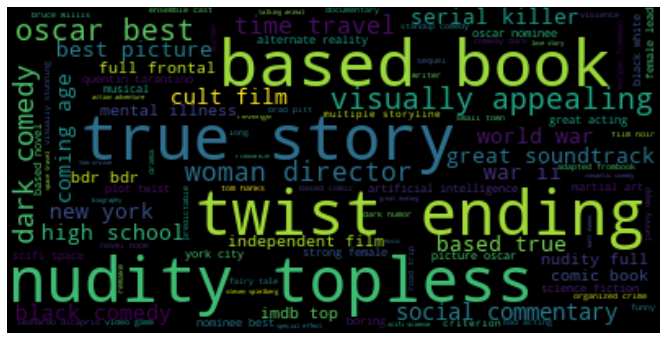

CPU times: user 9.59 s, sys: 516 ms, total: 10.1 s
Wall time: 10.1 s


In [7]:
%%time
# define the size of the plots
plt.rcParams['figure.figsize'] = [60, 6]

# lower max_font_size
wordcloud = WordCloud(max_font_size=40, max_words=100).generate(word_list)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The most common user tags include based, book, true story, nudity, topless and twist ending. 

In [26]:
%time
user_tag_vectorizer = TfidfVectorizer(ngram_range=(1,1), 
                                      stop_words=[' ', ''],
                                      max_features=1000
                                     )
tag_vectorized = user_tag_vectorizer.fit_transform(normalized_tags.tag)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


In [27]:
movie_id = 120
user_tag = 'true story twist ending'
reference = user_tag_vectorizer.transform(np.array([user_tag]))

In [28]:
similar_ref = pd.DataFrame(cosine_similarity(tag_vectorized, reference), columns=['similarity_to_reference'])

In [29]:
normalized = normalized_tags.merge(movie_name, how='left', on='movieId')
tags_with_ref = pd.concat([normalized, similar_ref], axis=1).sort_values(by='similarity_to_reference', ascending=False)
tags_with_ref.head()

,userId,movieId,tag,title,similarity_to_reference
49401,6862,114692,true story twist,"Overnighters, The (2014)",0.883363
172256,73765,5608,frightfully good mass behavior overthetop endi...,"Das Experiment (Experiment, The) (2001)",0.734073
88145,29288,27643,aleksi mäkelä criminals finnish jasper pääkkön...,Pahat pojat (2003),0.724497
242686,122043,81562,true story,127 Hours (2010),0.724497
76233,21096,107692,aviation hijacking true story,NaN,0.724497


In [30]:
def prepare_pivot(df):
    tags_pivot = df.pivot(index='userId', columns='movieId', values='similarity_to_reference')
    print(gc.collect())
    tags_pivot_mean = tags_pivot.mean(axis=1)
    print(gc.collect())
    tags_pivot_centered = tags_pivot.sub(tags_pivot_mean, axis=0)
    print(gc.collect())
    tags_pivot_centered = tags_pivot_centered.fillna(0, inplace=True)  
    return tags_pivot_centered

In [ ]:
prepare_pivot(tags_with_ref)

2474
0


<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

When evaluating the SVD model the metric of importance:-

**Root Mean Square Errors (RMSE)** this is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as MSE (Mean Squared Error) but the root of the value is considered while determining the accuracy of the model. The lower the RMSE, the better a given model is able to “fit” a dataset.
    
>>> $RMSE = \sqrt((\frac{1}{n}) * ∑(yi – xi)^2)$

>>> where:-

>>> Σ: Greek symbol for summation
    
>>> yi: Actual value for the ith observation
    
>>> xi: Calculated value for the ith observation
    
>>> n: Total number of observations

The SVD model had a RMSE of 0.8352. 
    
    


<a id="eight"></a>
## 8. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In simply terms, SVD tries to identify a relevant sub-space of all of the dimensions created by the noise in the data. In other words — it’s trying to simply down the data so that it knows that movie… and maybe one or two other factors are important in determining where the movies falls on a rating scale.

You can almost think about this of a line fitting problem. The SVD is trying to find a line in multi-dimensional space that allows it to classify the data in the most simple way. 